## FootballDecoded - Test Pass Network
### Prueba rápida de visualización de redes de pase

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from match_data import extract_match_data, get_team_summary
from pass_network import (
    create_pass_network,
    save_high_quality,
    create_pass_network_by_halves,
    create_pass_network_single_half
)

plt.style.use('default')
%matplotlib inline

In [2]:
print("Loading match data...")
match_data = extract_match_data(match_id=1825726, league="ESP-La Liga", season="2024-25")

Loading match data...
🎯 Procesando partido 1825726 (ESP-La Liga 2024-25)
   📂 Datos encontrados, cargando desde archivos...


In [3]:
# Define team colors
BARCELONA_COLORS = {
    'primary': '#A50044',    # Barcelona burgundy
    'secondary': '#004D98'   # Barcelona blue
}

ESPANYOL_COLORS = {
    'primary': '#0E4A99',    # Espanyol blue
    'secondary': '#FFFFFF'   # White
}


1. Barcelona - Full Match
Creating pass network for Barcelona (Full match)


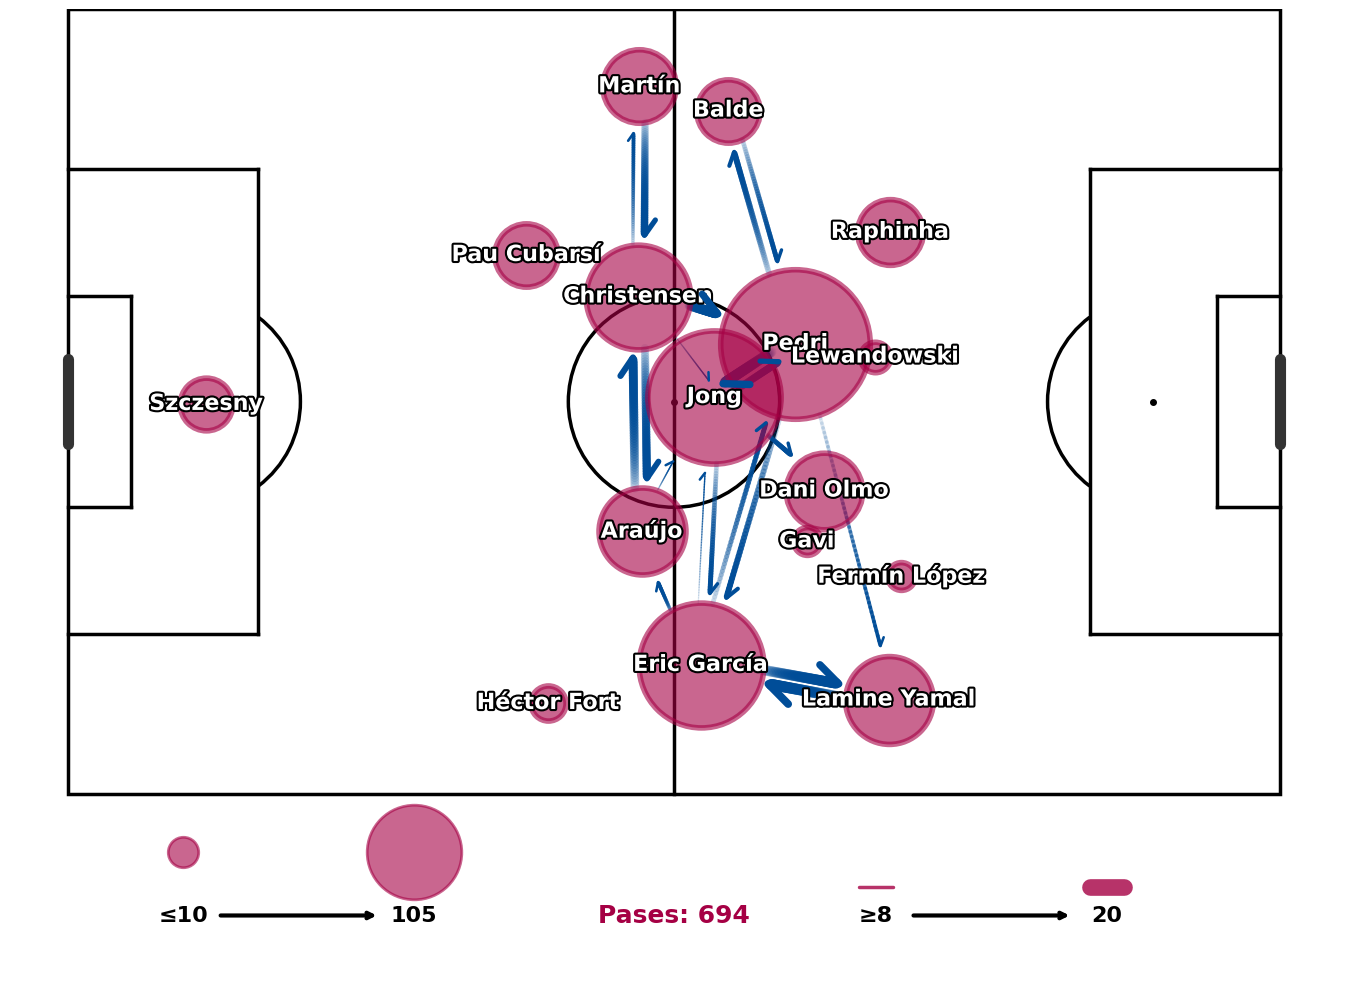


2. Espanyol - Full Match
Creating pass network for Espanyol (Full match)


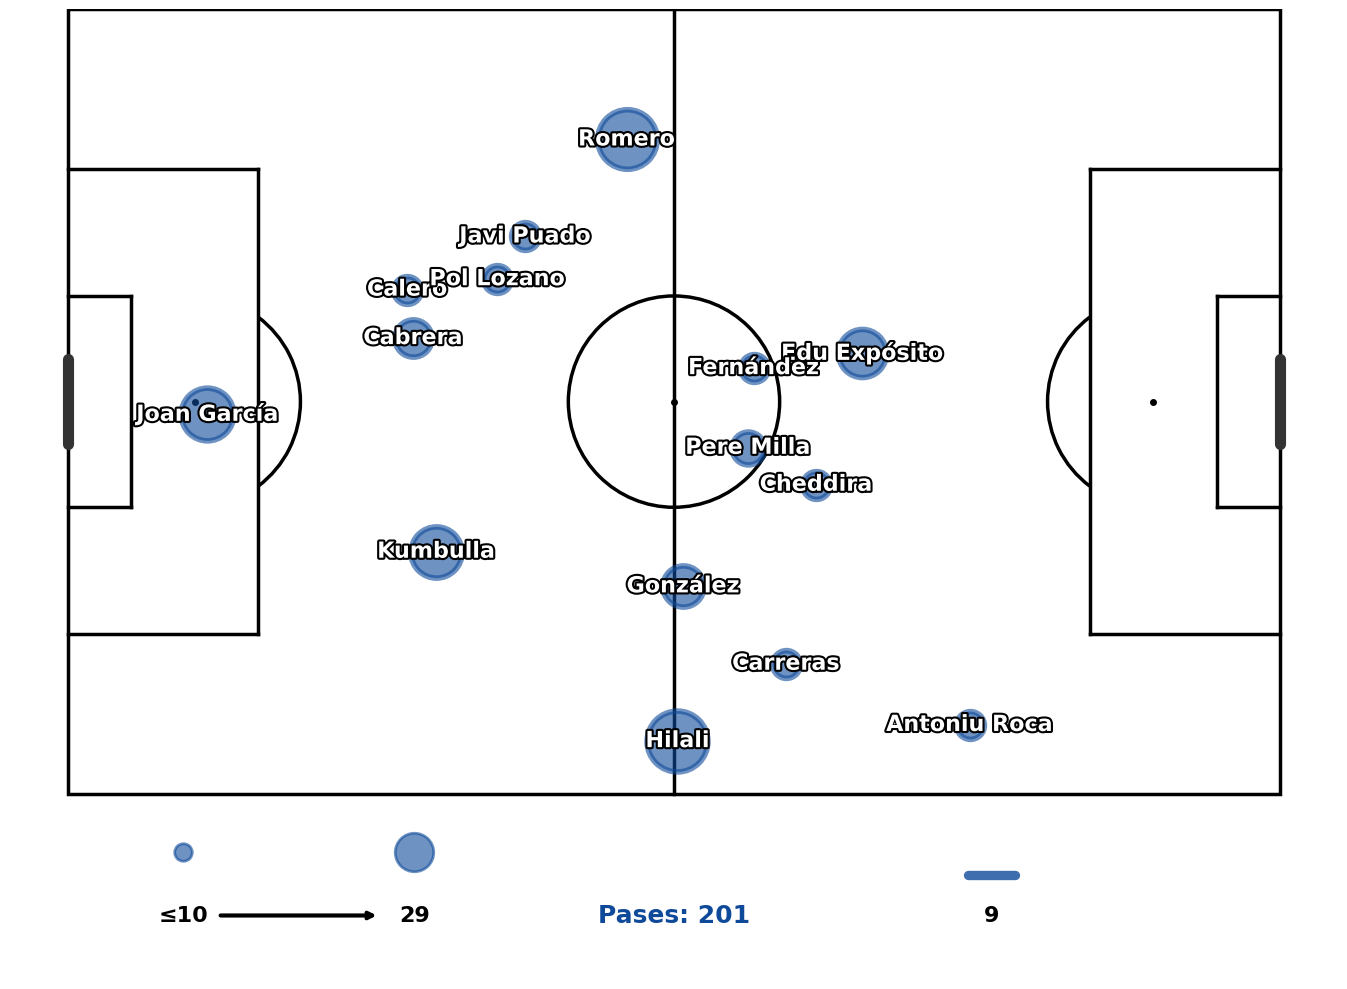

In [4]:
# Barcelona full match
print("\n1. Barcelona - Full Match")
fig_barca = create_pass_network(
    match_data, 
    "Barcelona",
    primary_color=BARCELONA_COLORS['primary'],
    secondary_color=BARCELONA_COLORS['secondary'],
)
plt.show()

# Espanyol full match  
print("\n2. Espanyol - Full Match")
fig_espanyol = create_pass_network(
    match_data, 
    "Espanyol",
    primary_color=ESPANYOL_COLORS['primary'], 
    secondary_color=ESPANYOL_COLORS['secondary'],
)
plt.show()